In [3]:
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling the missing values

In [8]:
# Check for missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

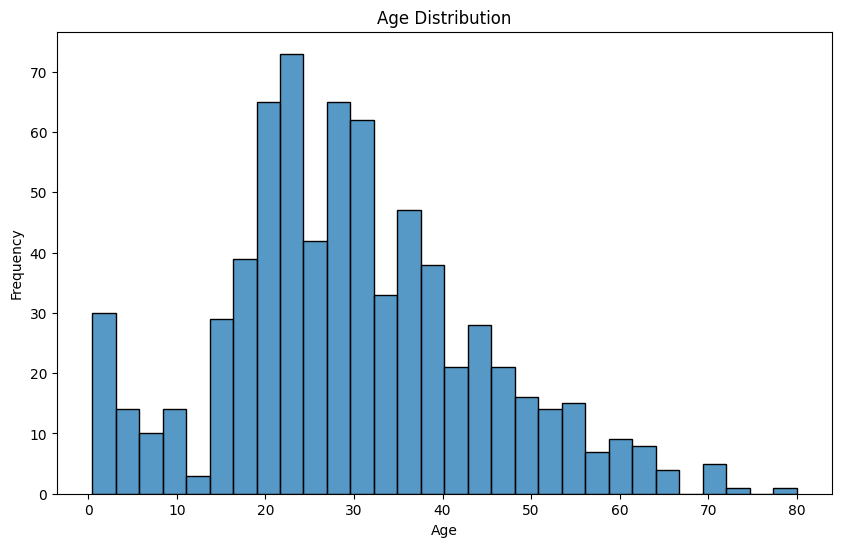

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=30 )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
# handle missing values
# replace missing values in 'Age' with the median age 
# as age is a continuous variable
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

C:\Users\manik\AppData\Local\Temp\ipykernel_19888\3027355085.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


In [11]:
train_df['Age'].isnull().sum()

0

In [12]:
#now we'll handle the 'Embarked' column
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
# handle missing values in 'Embarked' with the mode (most frequent value)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Embarked'].isnull().sum()

C:\Users\manik\AppData\Local\Temp\ipykernel_19888\1587686258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


0

In [14]:
# We'll drop the 'cabin' column as it does not provide much information and has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)

In [15]:
# now we perform same on the test set 
#check for missing values in the test set
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
#here we can see only the age,fare,cabin have missing values ,
# we drop the 'cabin' column as it does not provide much information and has too many missing values
test_df.drop(columns=['Cabin'], inplace=True)

In [17]:
#Handle missing values in 'Age' with the median age
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

C:\Users\manik\AppData\Local\Temp\ipykernel_19888\2434927998.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)


In [18]:
#Handle missing values in 'Fare' with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\manik\AppData\Local\Temp\ipykernel_19888\1836559268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


In [19]:
#check for missing values again
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Encoding the categorical columns

In [20]:
# we use  onehot encoding to convert categorical variables into numerical variables to embarked column
train_df = pd.get_dummies(train_df, columns=['Embarked'],dtype='int')
test_df = pd.get_dummies(test_df, columns=['Embarked'],dtype='int')

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1


In [22]:
#we use label encoding to convert categorical variables into numerical on sex column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [24]:
#drop the unwanted columns
train_df.drop(columns=['Name','Ticket'], inplace=True)
test_df.drop(columns=['Name','Ticket'], inplace=True)


In [25]:
print(train_df.dtypes)
print(test_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_C       int32
Embarked_Q       int32
Embarked_S       int32
dtype: object
PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_C       int32
Embarked_Q       int32
Embarked_S       int32
dtype: object


In [26]:
#scale the data using standard scaler for numerical columns for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])



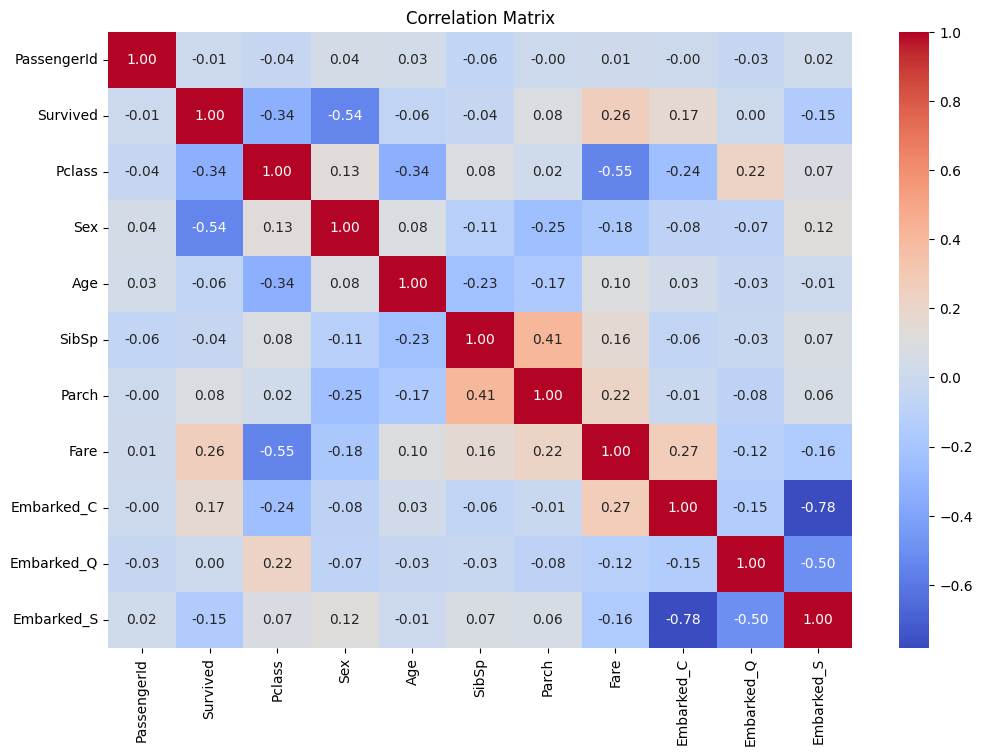

In [27]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [28]:
#separate the features and target variable
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(712, 10) (712,)


In [29]:
print(y_train.value_counts())
print(y_val.value_counts())

Survived
0    444
1    268
Name: count, dtype: int64
Survived
0    105
1     74
Name: count, dtype: int64


Accuracy: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[91 14]
 [17 57]]
ROC AUC Score: 0.9028957528957529
auc_score: 0.9028957528957529


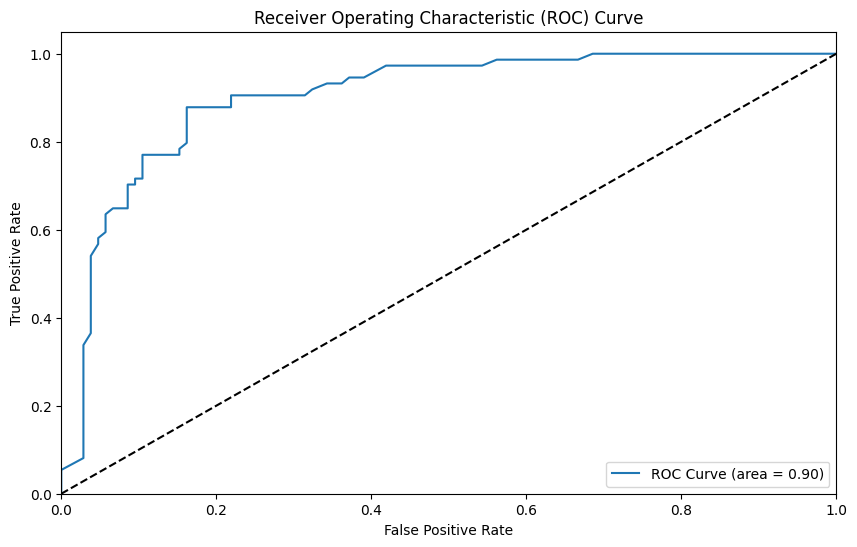

In [30]:
#machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve,auc

# peforming random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)[:, 1]
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
print("auc_score:",auc(fpr, tpr))

#plotting the roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




In [31]:
# Add optimal threshold finding
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
optimal_idx = np.argmax(precision + recall)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}")

Optimal threshold: 0.370


Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[89 16]
 [19 55]]
ROC AUC Score: 0.8770913770913771
auc_score: 0.8770913770913771


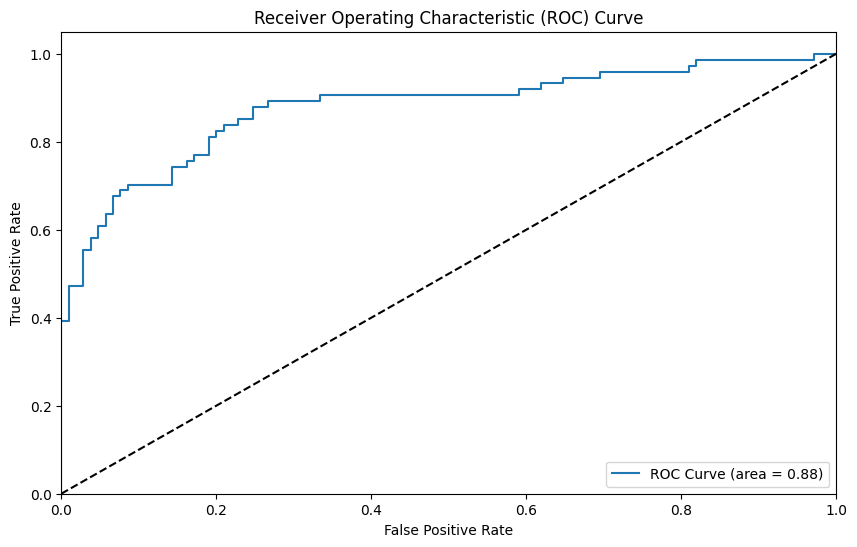

In [32]:
# now we perform logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_val)
y_pred_proba_log = log_reg.predict_proba(X_val)[:, 1]
print("Accuracy:", accuracy_score(y_val, y_pred_log))
print("Classification Report:\n", classification_report(y_val, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba_log))
fpr_log, tpr_log, thresholds_log = roc_curve(y_val, y_pred_proba_log)
print("auc_score:",auc(fpr_log, tpr_log))

#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, y_pred_proba_log)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [33]:
# optimal threshold finding for logistic regression
precision_log, recall_log, thresholds_log = precision_recall_curve(y_val, y_pred_proba_log)
optimal_idx_log = np.argmax(precision_log + recall_log)
optimal_threshold_log = thresholds_log[optimal_idx_log]
print(f"Optimal threshold for Logistic Regression: {optimal_threshold_log:.3f}")

Optimal threshold for Logistic Regression: 0.282


Accuracy: 0.7486033519553073
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       105
           1       0.70      0.69      0.69        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

Confusion Matrix:
 [[83 22]
 [23 51]]
ROC AUC Score: 0.7398326898326897
auc_score: 0.7398326898326897


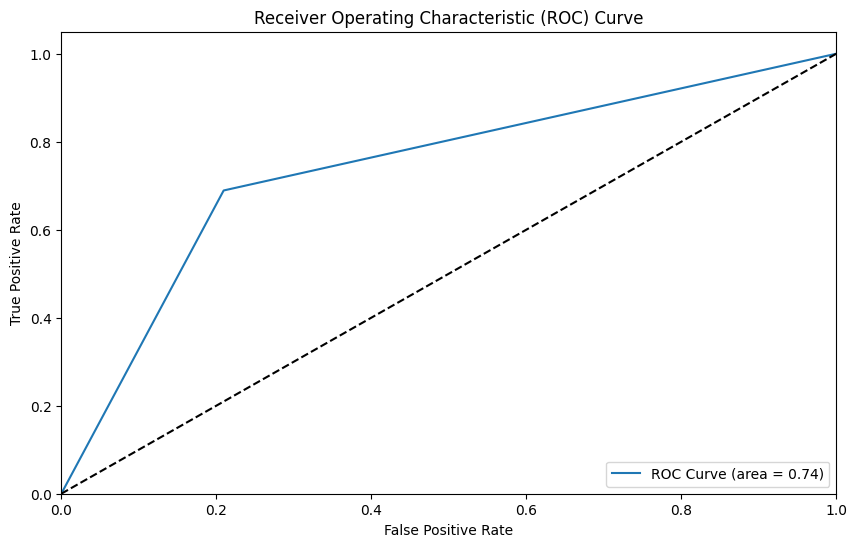

In [34]:
# now we use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
y_pred_proba_dt = dt.predict_proba(X_val)[:, 1]
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Classification Report:\n", classification_report(y_val, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba_dt))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, y_pred_proba_dt)
print("auc_score:",auc(fpr_dt, tpr_dt))

#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, y_pred_proba_dt)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [35]:
# optimal threshold finding for decision tree classifier
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_val, y_pred_proba_dt)
optimal_idx_dt = np.argmax(precision_dt + recall_dt)
optimal_threshold_dt = thresholds_dt[optimal_idx_dt]
print(f"Optimal threshold for Decision Tree Classifier: {optimal_threshold_dt:.3f}")

Optimal threshold for Decision Tree Classifier: 0.000


Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[93 12]
 [20 54]]
ROC AUC Score: 0.8754826254826253
auc_score: 0.8754826254826253


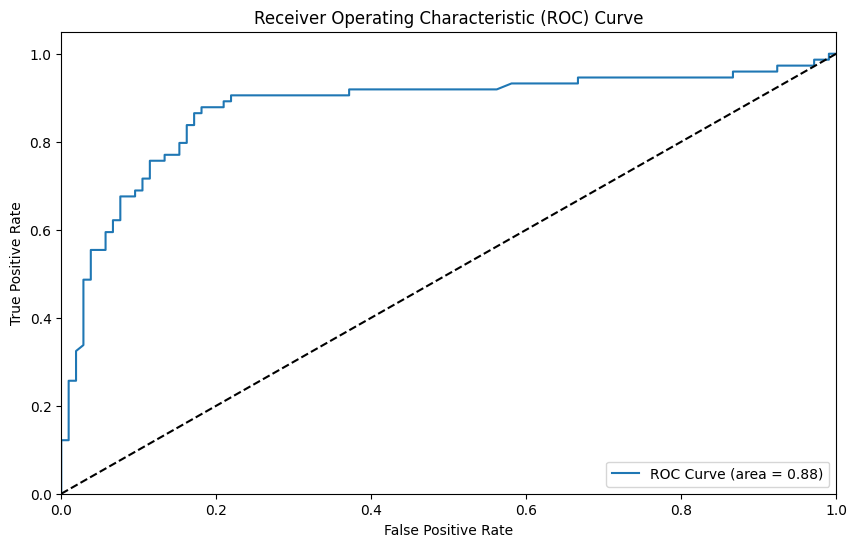

In [36]:
# now we use gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)
y_pred_proba_gb = gb.predict_proba(X_val)[:, 1]
print("Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Classification Report:\n", classification_report(y_val, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba_gb))
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_val, y_pred_proba_gb)
print("auc_score:",auc(fpr_gb, tpr_gb))

#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, y_pred_proba_gb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [37]:
# optimal threshold finding for gradient boosting classifier
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_val, y_pred_proba_gb)
optimal_idx_gb = np.argmax(precision_gb + recall_gb)
optimal_threshold_gb = thresholds_gb[optimal_idx_gb]
print(f"Optimal threshold for Gradient Boosting Classifier: {optimal_threshold_gb:.3f}")

Optimal threshold for Gradient Boosting Classifier: 0.225


c:\Users\manik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:07:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[88 17]
 [18 56]]
ROC AUC Score: 0.8593307593307593
auc_score: 0.8593307593307593


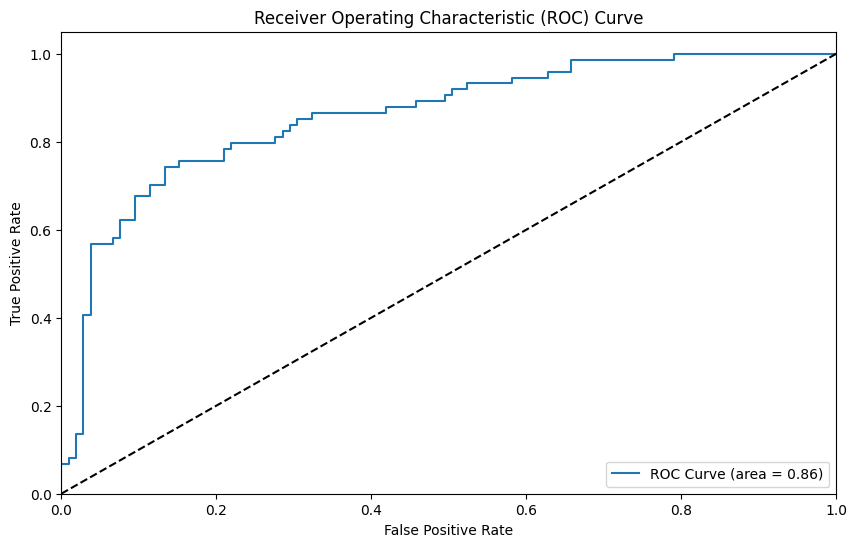

In [38]:
# we use xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
y_pred_proba_xgb = xgb.predict_proba(X_val)[:, 1]
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba_xgb))
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_pred_proba_xgb)
print("auc_score:",auc(fpr_xgb, tpr_xgb))

#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb, tpr_xgb, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, y_pred_proba_xgb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
# optimal threshold finding for xgboost classifier
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_val, y_pred_proba_xgb)
optimal_idx_xgb = np.argmax(precision_xgb + recall_xgb)
optimal_threshold_xgb = thresholds_xgb[optimal_idx_xgb]
print(f"Optimal threshold for XGBoost Classifier: {optimal_threshold_xgb:.3f}")

Optimal threshold for XGBoost Classifier: 0.637


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters for Random Forest Classifier: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Best ROC AUC Score for Random Forest Classifier: 0.8565444658141287
accuracy_score: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[91 14]
 [18 56]]
ROC AUC Score: 0.9036036036036036
auc_score: 0.9036036036036036


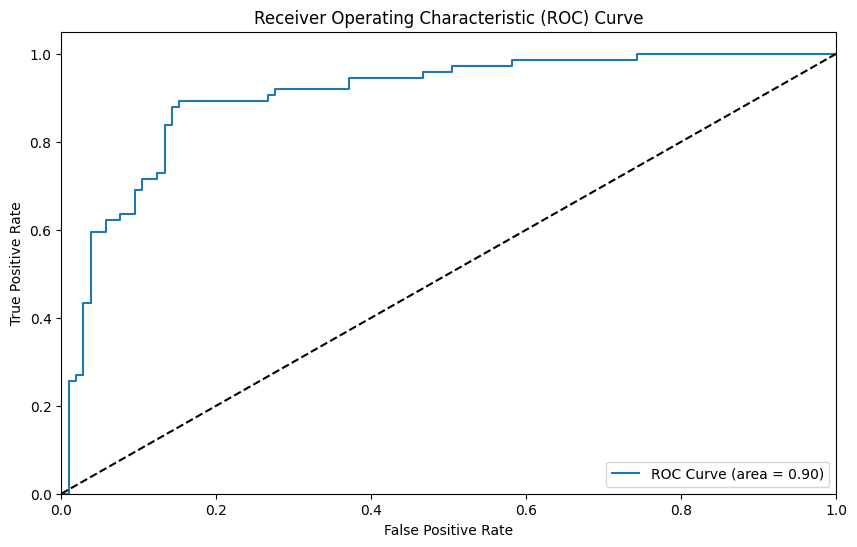

Optimal threshold for Random Forest Classifier with Grid Search: 0.371


In [41]:
# now we perform hyperparameter tuning using grid search for random forest classifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 30],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest with class_weight parameter
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform GridSearchCV with multiple scoring metrics
rf_grid = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=3,
    n_jobs=-1, 
    verbose=2,
    scoring={
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc',
        'f1': 'f1'
    },
    refit='roc_auc'  # Choose which metric to use for selecting the best model
)
rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest Classifier:", rf_grid.best_params_)
print("Best ROC AUC Score for Random Forest Classifier:", rf_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, rf_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, rf_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, rf_grid.predict_proba(X_val)[:, 1]))
fpr_rf_grid, tpr_rf_grid, thresholds_rf_grid = roc_curve(y_val, rf_grid.predict_proba(X_val)[:, 1])
print("auc_score:",auc(fpr_rf_grid, tpr_rf_grid))
#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_grid, tpr_rf_grid, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, rf_grid.predict_proba(X_val)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# optimal threshold finding for random forest classifier with grid search
precision_rf_grid, recall_rf_grid, thresholds_rf_grid = precision_recall_curve(y_val, rf_grid.predict_proba(X_val)[:, 1])
optimal_idx_rf_grid = np.argmax(precision_rf_grid + recall_rf_grid)
optimal_threshold_rf_grid = thresholds_rf_grid[optimal_idx_rf_grid]
print(f"Optimal threshold for Random Forest Classifier with Grid Search: {optimal_threshold_rf_grid:.3f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC Score for Logistic Regression: 0.8420174824351208
accuracy_score: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[89 16]
 [20 54]]
ROC AUC Score: 0.8733590733590735
auc_score: 0.8733590733590735


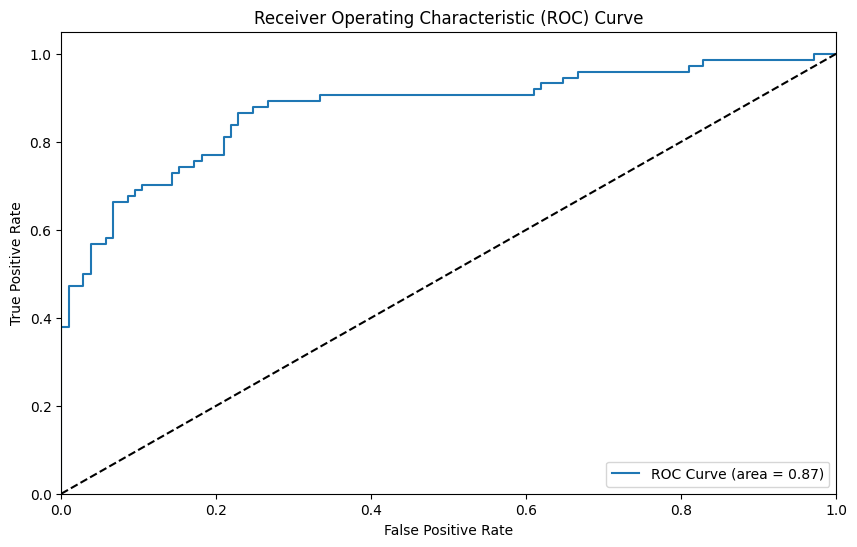

Optimal threshold for Logistic Regression using Grid Search: 0.279


In [42]:
# we hyperparameter tuning using grid search for logistic regression using grid search
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Use a solver compatible with l1
    'max_iter': [100, 200]
}
log_reg = LogisticRegression(random_state=42)
log_reg_grid = GridSearchCV(
    estimator=log_reg, 
    param_grid=param_grid_log_reg, 
    cv=5,
    n_jobs=-1, 
    verbose=2,
    scoring={
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc',
        'f1': 'f1'
    },
    refit='roc_auc'  # Choose which metric to use for selecting the best model
)
log_reg_grid.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)
print("Best ROC AUC Score for Logistic Regression:", log_reg_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, log_reg_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, log_reg_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, log_reg_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, log_reg_grid.predict_proba(X_val)[:, 1]))
fpr_log_reg_grid, tpr_log_reg_grid, thresholds_log_reg_grid = roc_curve(y_val, log_reg_grid.predict_proba(X_val)[:, 1])
print("auc_score:",auc(fpr_log_reg_grid, tpr_log_reg_grid))
#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg_grid, tpr_log_reg_grid, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, log_reg_grid.predict_proba(X_val)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# optimal threshold finding for logistic regression using grid search
precision_log_reg_grid, recall_log_reg_grid, thresholds_log_reg_grid = precision_recall_curve(y_val, log_reg_grid.predict_proba(X_val)[:, 1])
optimal_idx_log_reg_grid = np.argmax(precision_log_reg_grid + recall_log_reg_grid)
optimal_threshold_log_reg_grid = thresholds_log_reg_grid[optimal_idx_log_reg_grid]
print(f"Optimal threshold for Logistic Regression using Grid Search: {optimal_threshold_log_reg_grid:.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best ROC AUC Score for Decision Tree Classifier: 0.8273068826916612
accuracy_score: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[93 12]
 [25 49]]
ROC AUC Score: 0.8576576576576577
auc_score: 0.8576576576576577


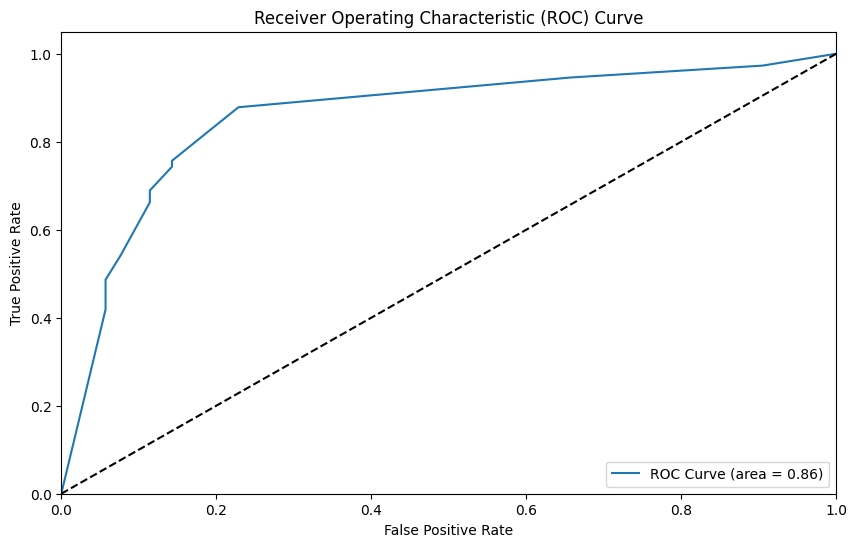

Optimal threshold for Decision Tree Classifier: 0.167


In [43]:
# for decision tree classifier hyperparameter tuning using grid search
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(
    estimator=dt, 
    param_grid=param_grid_dt, 
    cv=5,
    n_jobs=-1, 
    verbose=2,
    scoring={
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc',
        'f1': 'f1'
    },
    refit='roc_auc'  # Choose which metric to use for selecting the best model
)
dt_grid.fit(X_train, y_train)
print("Best parameters for Decision Tree Classifier:", dt_grid.best_params_)
print("Best ROC AUC Score for Decision Tree Classifier:", dt_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, dt_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, dt_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, dt_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, dt_grid.predict_proba(X_val)[:, 1]))
fpr_dt_grid, tpr_dt_grid, thresholds_dt_grid = roc_curve(y_val, dt_grid.predict_proba(X_val)[:, 1])
print("auc_score:",auc(fpr_dt_grid, tpr_dt_grid))
#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt_grid, tpr_dt_grid, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, dt_grid.predict_proba(X_val)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# optimal threshold finding for decision tree classifier
precision_dt_grid, recall_dt_grid, thresholds_dt_grid = precision_recall_curve(y_val, dt_grid.predict_proba(X_val)[:, 1])
optimal_idx_dt_grid = np.argmax(precision_dt_grid + recall_dt_grid)
optimal_threshold_dt_grid = thresholds_dt_grid[optimal_idx_dt_grid]
print(f"Optimal threshold for Decision Tree Classifier: {optimal_threshold_dt_grid:.3f}")


In [44]:
# There is more increment in area of roc curve , accuracy  after hyperparameter tuning in decision tree

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}
Best ROC AUC Score for Gradient Boosting Classifier: 0.8567060033948415
accuracy_score: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

Confusion Matrix:
 [[94 11]
 [20 54]]
ROC AUC Score: 0.8788931788931789
auc_score: 0.8788931788931789


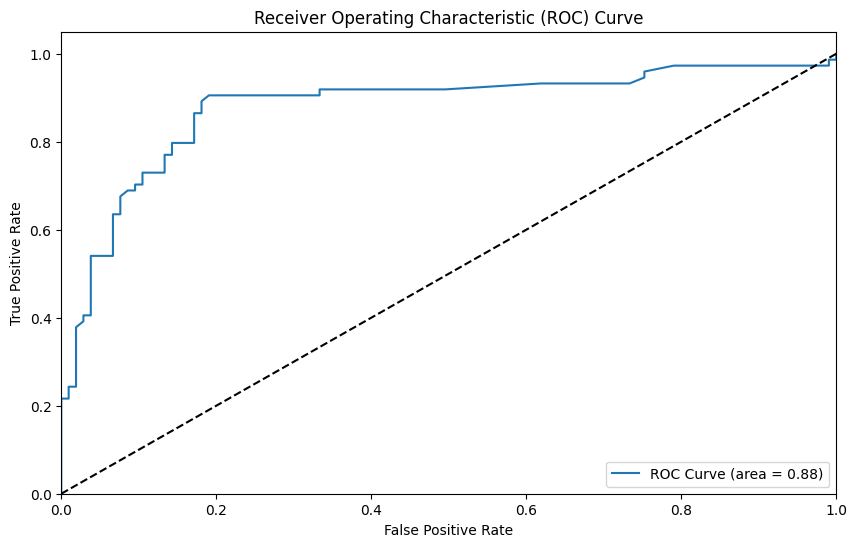

Optimal threshold for Gradient Boosting Classifier after hyperparameter tuning: 0.215


In [45]:
# we hyperparameter tuning gtradient boosting classifier using grid search
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}
gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(
    estimator=gb, 
    param_grid=param_grid_gb, 
    cv=5,
    n_jobs=-1, 
    verbose=2,
    scoring={
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc',
        'f1': 'f1'
    },
    refit='roc_auc'  # Choose which metric to use for selecting the best model
)
gb_grid.fit(X_train, y_train)
print("Best parameters for Gradient Boosting Classifier:", gb_grid.best_params_)
print("Best ROC AUC Score for Gradient Boosting Classifier:", gb_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, gb_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, gb_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, gb_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, gb_grid.predict_proba(X_val)[:, 1]))
fpr_gb_grid, tpr_gb_grid, thresholds_gb_grid = roc_curve(y_val, gb_grid.predict_proba(X_val)[:, 1])
print("auc_score:",auc(fpr_gb_grid, tpr_gb_grid))
#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_gb_grid, tpr_gb_grid, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, gb_grid.predict_proba(X_val)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# optimal threshold finding for gradient boosting classifier after hyperparameter tuning
precision_gb_grid, recall_gb_grid, thresholds_gb_grid = precision_recall_curve(y_val, gb_grid.predict_proba(X_val)[:, 1])
optimal_idx_gb_grid = np.argmax(precision_gb_grid + recall_gb_grid)
optimal_threshold_gb_grid = thresholds_gb_grid[optimal_idx_gb_grid]
print(f"Optimal threshold for Gradient Boosting Classifier after hyperparameter tuning: {optimal_threshold_gb_grid:.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\manik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost Classifier: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best ROC AUC Score for XGBoost Classifier: 0.8576582463030418
accuracy_score: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[91 14]
 [19 55]]
ROC AUC Score: 0.8738738738738739
auc_score: 0.8738738738738739


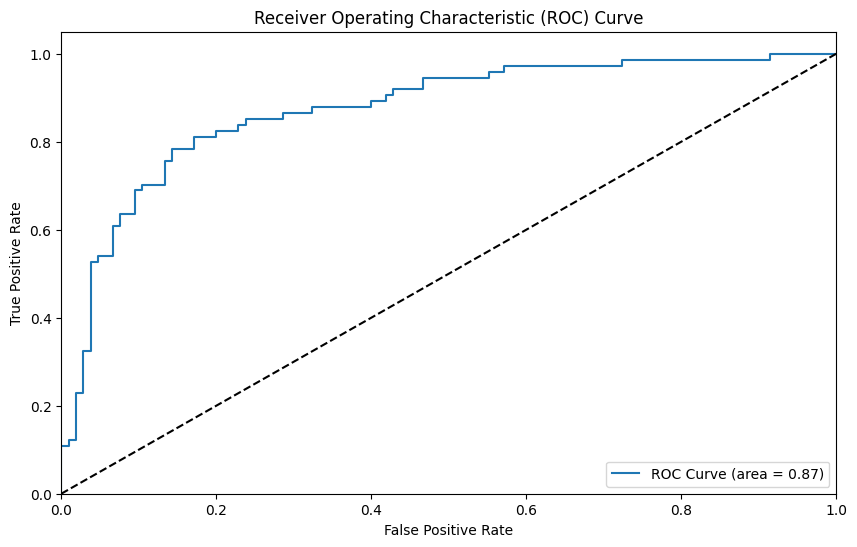

Optimal threshold for XGBoost Classifier after hyperparameter tuning: 0.406


In [46]:
# we hyperparameter tunining xgboost classifier using grid search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid_xgb, 
    cv=5,
    n_jobs=-1, 
    verbose=2,
    scoring={
        'accuracy': 'accuracy',
        'roc_auc': 'roc_auc',
        'f1': 'f1'
    },
    refit='roc_auc'  # Choose which metric to use for selecting the best model
)
xgb_grid.fit(X_train, y_train)
print("Best parameters for XGBoost Classifier:", xgb_grid.best_params_)
print("Best ROC AUC Score for XGBoost Classifier:", xgb_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, xgb_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, xgb_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, xgb_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, xgb_grid.predict_proba(X_val)[:, 1]))
fpr_xgb_grid, tpr_xgb_grid, thresholds_xgb_grid = roc_curve(y_val, xgb_grid.predict_proba(X_val)[:, 1])
print("auc_score:",auc(fpr_xgb_grid, tpr_xgb_grid))
#plotting the roc curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_xgb_grid, tpr_xgb_grid, label='ROC Curve (area = {:.2f})'.format(roc_auc_score(y_val, xgb_grid.predict_proba(X_val)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# optimal threshold finding for xgboost classifier after hyperparameter tuning
precision_xgb_grid, recall_xgb_grid, thresholds_xgb_grid = precision_recall_curve(y_val, xgb_grid.predict_proba(X_val)[:, 1])
optimal_idx_xgb_grid = np.argmax(precision_xgb_grid + recall_xgb_grid)
optimal_threshold_xgb_grid = thresholds_xgb_grid[optimal_idx_xgb_grid]
print(f"Optimal threshold for XGBoost Classifier after hyperparameter tuning: {optimal_threshold_xgb_grid:.3f}")

In [47]:
# Now we will use the best model from the grid search for final predictions on the test set
# we print comparison of all the models using different metrics
print("Comparison of all models:")
print("Random Forest Classifier:")
print("Best parameters:", rf_grid.best_params_)
print("Best ROC AUC Score:", rf_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, rf_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, rf_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, rf_grid.predict_proba(X_val)[:, 1]))
fpr_rf_grid, tpr_rf_grid, thresholds_rf_grid = roc_curve(y_val, rf_grid.predict_proba(X_val)[:, 1])
print("Logistic Regression:")
print("Best parameters:", log_reg_grid.best_params_)
print("Best ROC AUC Score:", log_reg_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, log_reg_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, log_reg_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, log_reg_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, log_reg_grid.predict_proba(X_val)[:, 1]))
fpr_log_reg_grid, tpr_log_reg_grid, thresholds_log_reg_grid = roc_curve(y_val, log_reg_grid.predict_proba(X_val)[:, 1])
print("Decision Tree Classifier:")
print("Best parameters:", dt_grid.best_params_)
print("Best ROC AUC Score:", dt_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, dt_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, dt_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, dt_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, dt_grid.predict_proba(X_val)[:, 1]))
fpr_dt_grid, tpr_dt_grid, thresholds_dt_grid = roc_curve(y_val, dt_grid.predict_proba(X_val)[:, 1])
print("Gradient Boosting Classifier:")
print("Best parameters:", gb_grid.best_params_)
print("Best ROC AUC Score:", gb_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, gb_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, gb_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, gb_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, gb_grid.predict_proba(X_val)[:, 1]))
fpr_gb_grid, tpr_gb_grid, thresholds_gb_grid = roc_curve(y_val, gb_grid.predict_proba(X_val)[:, 1])
print("XGBoost Classifier:")
print("Best parameters:", xgb_grid.best_params_)
print("Best ROC AUC Score:", xgb_grid.best_score_)
print("accuracy_score:", accuracy_score(y_val, xgb_grid.predict(X_val)))
print("Classification Report:\n", classification_report(y_val, xgb_grid.predict(X_val)))
print("Confusion Matrix:\n", confusion_matrix(y_val, xgb_grid.predict(X_val)))
print("ROC AUC Score:", roc_auc_score(y_val, xgb_grid.predict_proba(X_val)[:, 1]))


Comparison of all models:
Random Forest Classifier:
Best parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Best ROC AUC Score: 0.8565444658141287
accuracy_score: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[91 14]
 [18 56]]
ROC AUC Score: 0.9036036036036036
Logistic Regression:
Best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC Score: 0.8420174824351208
accuracy_score: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83     

In [48]:
ft = pd.DataFrame(test_df)
#add passenger id to the test set from test.csv in same order as train set
tst = pd.read_csv('../data/test.csv')
ft.insert(0, 'PassengerId', tst['PassengerId'])


ValueError: cannot insert PassengerId, already exists

In [49]:
#Now from above we can see that best model is random forest Classifier
# now we will use the random forest classifier with best parameters to make predictions on the test set
y_test_pred = rf_grid.predict(ft)
y_test_pred_proba = rf_grid.predict_proba(ft)[:, 1]
print("Test set predictions:", y_test_pred)
print("Test set predictions probabilities:", y_test_pred_proba)


Test set predictions: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]
Test set predictions probabilities: [0.18132645 0.379299   0.16788679 0.28971895 0.48189891 0.15025958
 0.60748297 0.22910949 0.7

In [ ]:
#now we will save the predictions to a csv file
submission_df = pd.DataFrame({'PassengerId': ft['PassengerId'], 'Survived': y_test_pred})

submission_df.to_csv('gender_submission_by_random-forest.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
